In [5]:
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras import layers, models



In [6]:
clean_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Clean\spectrogram'
noise_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Noise\spectrogram'

clean_spect_paths = os.listdir(clean_dir)
noise_spect_paths = os.listdir(noise_dir)

for i, j in zip(clean_spect_paths, noise_spect_paths):
    print(i,j)
    if i != j:
        print('not equal')

100_0.npy 100_0.npy
100_1.npy 100_1.npy
100_2.npy 100_2.npy
100_3.npy 100_3.npy
101_0.npy 101_0.npy
101_1.npy 101_1.npy
101_2.npy 101_2.npy
101_3.npy 101_3.npy
101_4.npy 101_4.npy
102_0.npy 102_0.npy
102_1.npy 102_1.npy
102_2.npy 102_2.npy
102_3.npy 102_3.npy
103_0.npy 103_0.npy
103_1.npy 103_1.npy
103_2.npy 103_2.npy
103_3.npy 103_3.npy
104_0.npy 104_0.npy
104_1.npy 104_1.npy
104_2.npy 104_2.npy
104_3.npy 104_3.npy
11_0.npy 11_0.npy
11_1.npy 11_1.npy
12_0.npy 12_0.npy
12_1.npy 12_1.npy
13_0.npy 13_0.npy
13_1.npy 13_1.npy
14_0.npy 14_0.npy
14_1.npy 14_1.npy
15_0.npy 15_0.npy
15_1.npy 15_1.npy
16_0.npy 16_0.npy
16_1.npy 16_1.npy
17_0.npy 17_0.npy
17_1.npy 17_1.npy
17_2.npy 17_2.npy
18_0.npy 18_0.npy
18_1.npy 18_1.npy
18_2.npy 18_2.npy
18_3.npy 18_3.npy
18_4.npy 18_4.npy
19_0.npy 19_0.npy
19_1.npy 19_1.npy
19_2.npy 19_2.npy
19_3.npy 19_3.npy
19_4.npy 19_4.npy
1_0.npy 1_0.npy
1_1.npy 1_1.npy
1_2.npy 1_2.npy
1_3.npy 1_3.npy
1_4.npy 1_4.npy
20_0.npy 20_0.npy
20_1.npy 20_1.npy
20_2.npy 20_2.

In [7]:
clean_spect_paths = [os.path.join(clean_dir, i) for i in clean_spect_paths]
noise_spect_paths = [os.path.join(noise_dir, i) for i in noise_spect_paths]

print(clean_spect_paths[:5])
print()
print(noise_spect_paths[:5])

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\101_0.npy']

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowshi

In [8]:
print(np.load(clean_spect_paths[1]).ndim)
print(np.load(noise_spect_paths[1]).ndim)

2
2


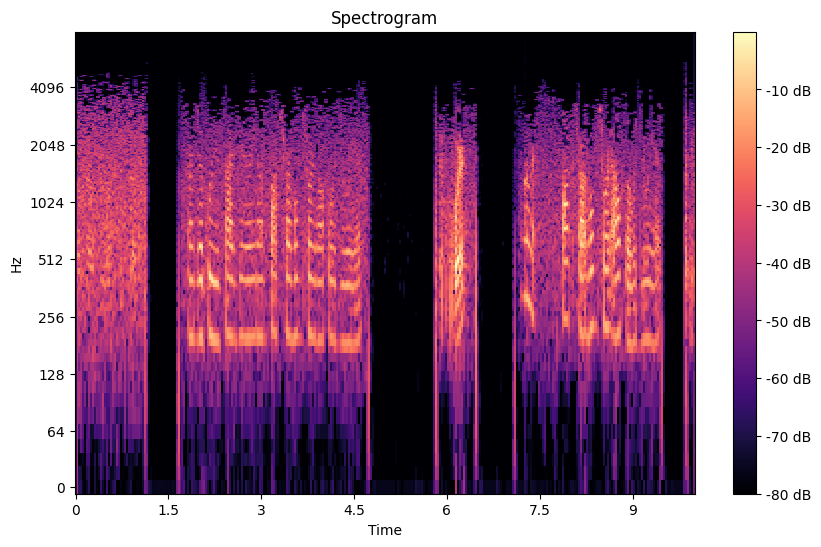

In [9]:
def plot_spectrogram(spectrogram, sr=16000, hop_length=512, title="Spectrogram"):
    """
    Visualizes a spectrogram using librosa and matplotlib.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()
plot_spectrogram(np.load(clean_spect_paths[0]))

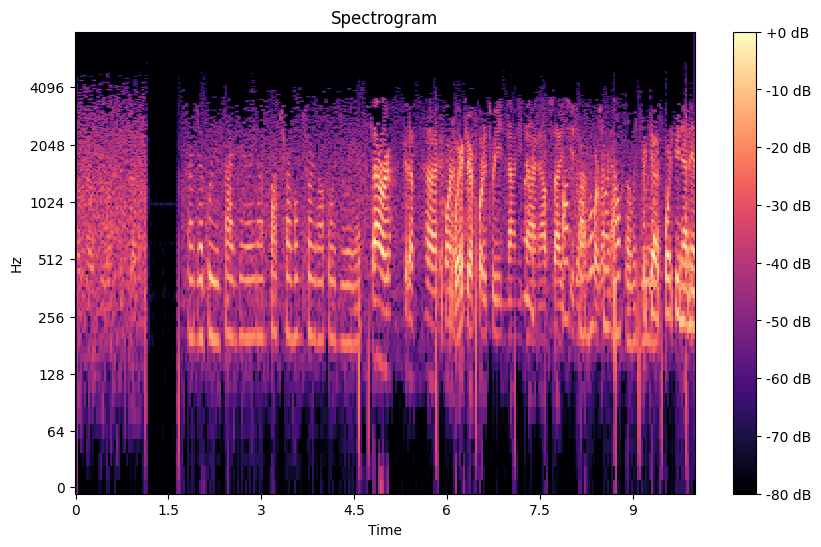

In [10]:
plot_spectrogram(np.load(noise_spect_paths[0]))

In [11]:
np.load(noise_spect_paths[0]).dtype

dtype('float32')

In [12]:
from sklearn.model_selection import train_test_split

train_noisy, test_noisy, train_clean, test_clean = train_test_split(noise_spect_paths, clean_spect_paths, test_size=0.2, random_state=42)


In [13]:
print(len(train_noisy))
print(len(test_noisy))
print(len(train_clean))
print(len(test_clean))

119
30
119
30


In [14]:
train_data = tf.data.Dataset.from_tensor_slices((train_noisy, train_clean))
test_data = tf.data.Dataset.from_tensor_slices((test_noisy, test_clean))

In [15]:
# for i, j in test_data:
#     print(np.expand_dims(np.load(i.numpy()).astype(np.float16), axis = -1))
#     break

In [16]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [noise_path], tf.float16))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [clean_path], tf.float16))
                              
    return noise, clean

train_data = train_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)


batch_size = 2 # Choose an appropriate batch size for your model

# Batch the dataset
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)



# Batch the dataset
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [17]:
for x, y in train_data.take(2):
    print(x.shape, x.dtype)
    
    

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


In [18]:
for x, y in test_data.take(2):
    print(x.shape, y.dtype)

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape (height, width, channels)
input_shape = (513, 313, 1)

# Build the model
def build_denoising_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # # Encoder
    # x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    # x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (256, 157, 32)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (128, 79, 64)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (64, 40, 128)
    
    # Bottleneck
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Output: (64, 40, 256)
    
    # Decoder with explicit upsampling layers
    x = layers.UpSampling2D((2, 2))(x)  # Output: (128, 80, 256)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)  # Output: (128, 80, 128)
    
    x = layers.UpSampling2D((2, 2))(x)  # Output: (256, 160, 128)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)  # Output: (256, 160, 64)
    
    # x = layers.UpSampling2D((2, 2))(x)  # Output: (512, 320, 64)
    # x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)  # Output: (512, 320, 32)

    # Final reconstruction to match the input shape
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Output: (513, 313, 1)

    outputs = layers.Cropping2D(cropping=((2, 1), (2, 1)))(outputs)
    # outputs = layers.Cropping2D(cropping=((0,1), (1,1)))(outputs)
    # Create the model
    autoencoder = models.Model(inputs, outputs)
    
    return autoencoder

# Build the model
autoencoder = build_denoising_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model



In [16]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 513, 313, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 513, 313, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 257, 157, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 257, 157, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 129, 79, 128)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 129, 79, 256)      295168

In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz==0.20.3

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pydot==1.4.1


Note: you may need to restart the kernel to use updated packages.


In [21]:

tf.keras.utils.plot_model(autoencoder)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


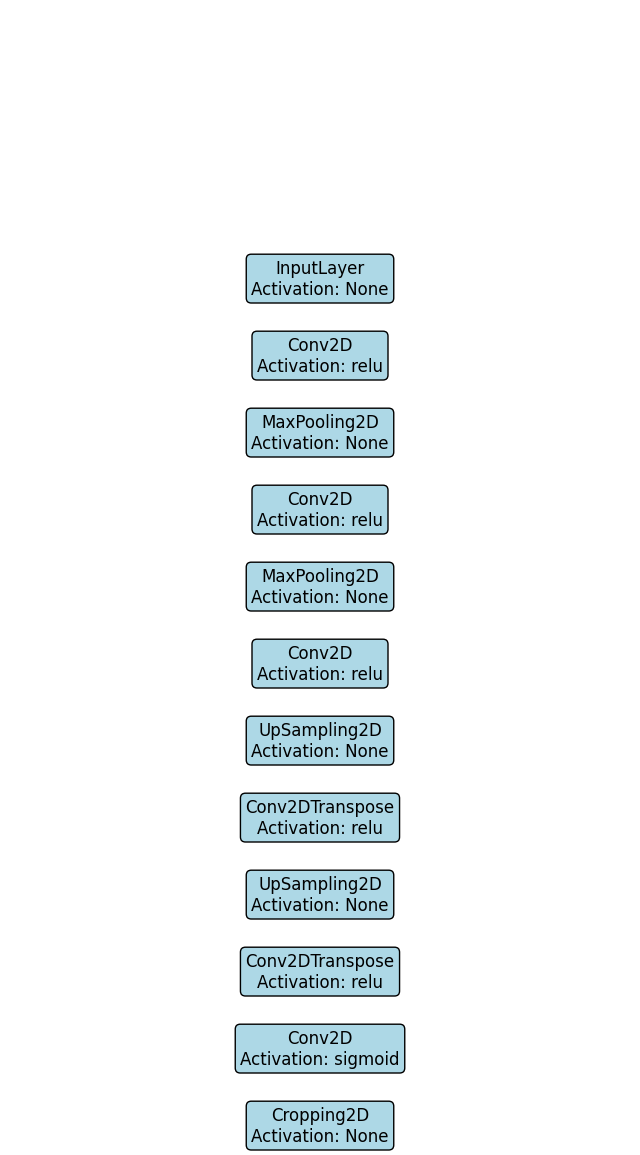

In [23]:
def plot_sequential_model(model):
    layers = [layer.__class__.__name__ for layer in model.layers]
    activations = [layer.activation.__name__ if hasattr(layer, 'activation') else 'None' for layer in model.layers]

    plt.figure(figsize=(8, 6))
    for i, (layer_name, activation) in enumerate(zip(layers, activations)):
        plt.text(0.5, 1 - i*0.4, f"{layer_name}\nActivation: {activation}", 
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))

    plt.xlim(0, 1)
    plt.ylim(0, len(layers) * 0.2)
    plt.axis('off')
    plt.show()

# Plot the model
plot_sequential_model(autoencoder)

In [28]:
history = autoencoder.fit(train_data, epochs=25)

Epoch 1/25
60/60 [==============================] - 68s 861ms/step - loss: 4.1722
Epoch 2/25
60/60 [==============================] - 45s 754ms/step - loss: 4.0920
Epoch 3/25
60/60 [==============================] - 21s 345ms/step - loss: 4.0816
Epoch 4/25
60/60 [==============================] - 20s 329ms/step - loss: 4.0808
Epoch 5/25
60/60 [==============================] - 19s 325ms/step - loss: 4.0811
Epoch 6/25
60/60 [==============================] - 13s 224ms/step - loss: 4.0815
Epoch 7/25
60/60 [==============================] - 25s 424ms/step - loss: 4.0709
Epoch 8/25
60/60 [==============================] - 26s 442ms/step - loss: 4.0780
Epoch 9/25
60/60 [==============================] - 31s 518ms/step - loss: 4.0700
Epoch 10/25
60/60 [==============================] - 34s 556ms/step - loss: 4.0789
Epoch 11/25
60/60 [==============================] - 27s 446ms/step - loss: 4.0753
Epoch 12/25
60/60 [==============================] - 20s 339ms/step - loss: 4.0684
Epoch 13/25
6

In [23]:
autoencoder.evaluate(test_data)

15/15 [==============================] - 5s 332ms/step - loss: 4.1640


4.163973808288574

In [24]:
denoised_output = autoencoder.predict(test_data)

15/15 [==============================] - 3s 215ms/step


In [20]:
denoised_output.shape

(30, 513, 313, 1)

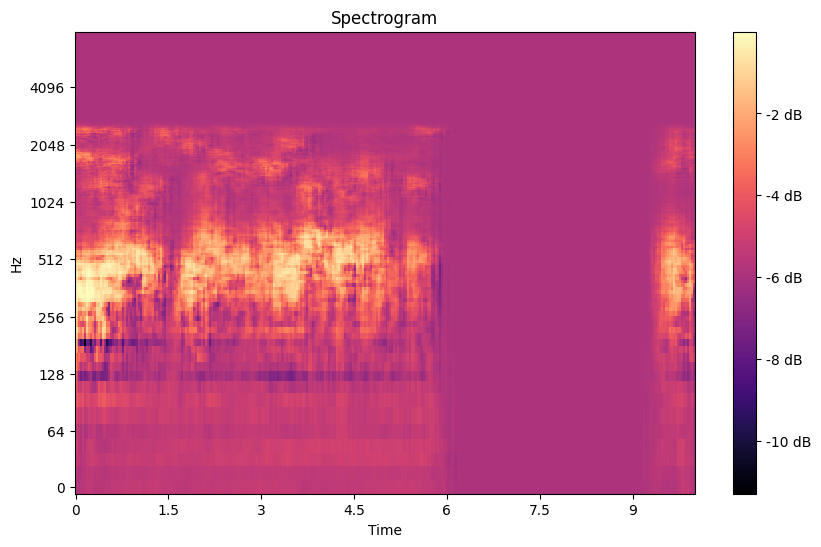

In [22]:
plot_spectrogram(np.squeeze(denoised_output[6]))

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


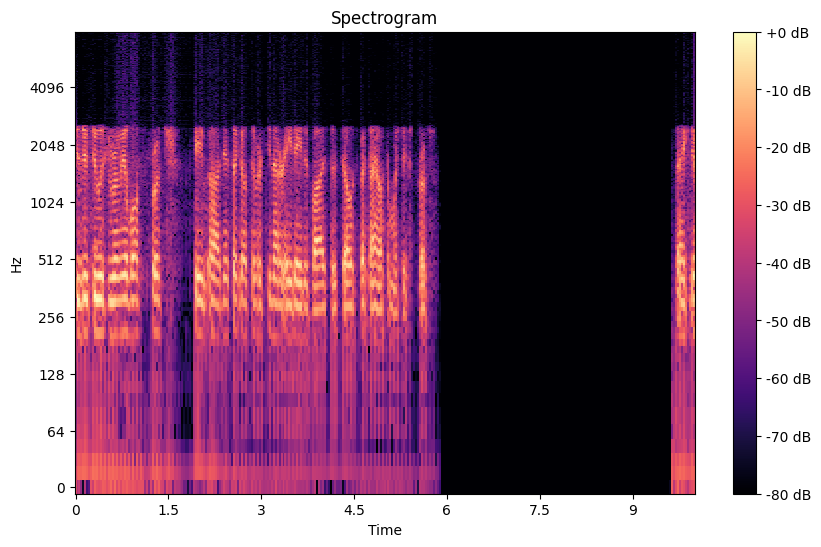

In [48]:
for x, y in test_data.take(4):
    print(x.shape, y.dtype)

plot_spectrogram(np.squeeze(y[0]))
    

Text(0.5, 1.0, 'loss')

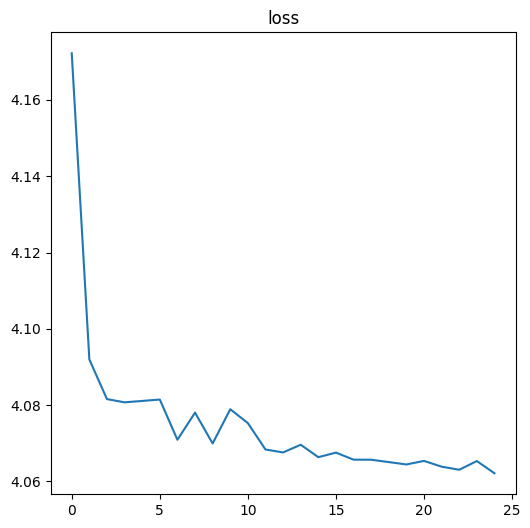

In [53]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'])
plt.title('loss')

In [116]:
dataset = tf.data.Dataset.from_tensor_slices((noise_spect_paths, clean_spect_paths))
print(dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [103]:
for i, j in dataset:
    print(np.expand_dims(np.load(i.numpy()), axis = -1))
    break

[[[2.5998892e-02]
  [5.5503488e-01]
  [1.1978779e-03]
  ...
  [3.0067597e-02]
  [3.0085091e-02]
  [4.7589415e-03]]

 [[2.6030071e-02]
  [5.5014724e-01]
  [4.4672107e-03]
  ...
  [4.5828514e-02]
  [4.8589792e-02]
  [3.0422678e-02]]

 [[2.6123255e-02]
  [5.4916686e-01]
  [2.7086951e-03]
  ...
  [3.5521913e-02]
  [4.0224563e-02]
  [5.6527875e-02]]

 ...

 [[6.7377549e-08]
  [9.9803700e-08]
  [3.7571226e-08]
  ...
  [6.0868541e-07]
  [1.5432937e-07]
  [4.3544609e-02]]

 [[5.0611504e-08]
  [4.0165268e-08]
  [1.7548746e-07]
  ...
  [2.7772208e-07]
  [1.8702339e-07]
  [4.3543641e-02]]

 [[6.2819517e-08]
  [3.6604156e-08]
  [1.0952742e-08]
  ...
  [4.9256056e-07]
  [2.0625841e-07]
  [4.3543667e-02]]]


In [117]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x), axis = -1), [noise_path], tf.float32))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x), axis = -1), [clean_path], tf.float32))
                              
    return noise, clean


dataset = dataset.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)

batch_size = 16  # Choose an appropriate batch size for your model

# Batch the dataset
dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [128]:
dataset.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))

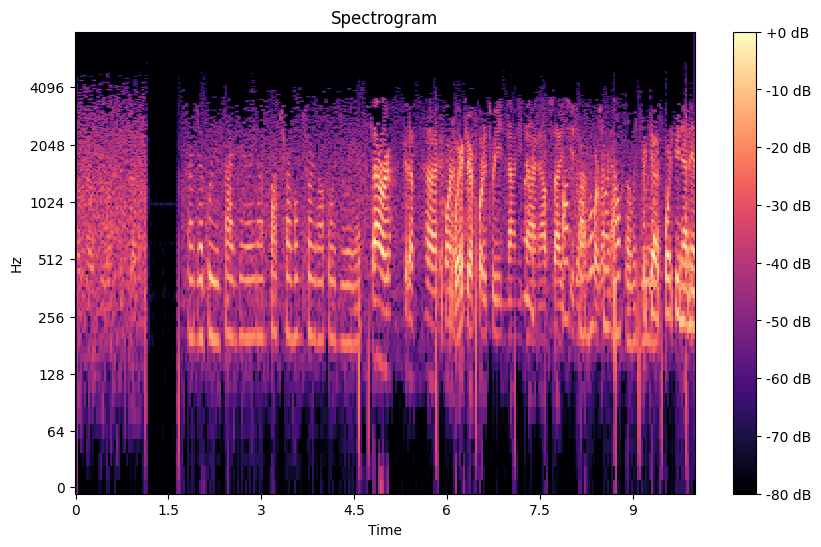

In [153]:
for x, y in dataset.take(1):
    plot_spectrogram(np.squeeze(x[0]))



In [156]:
for x, y in dataset.take(15):
    print(1)



1
1
1
1
1
1
1
1
1
1


In [3]:
autoencoder = tf.keras.models.load_model('auto_enc_1')

In [22]:
import librosa
import soundfile as sf
import numpy as np

# For STFT output
def spectrogram_to_audio(stft_matrix, hop_length=512):
    # Convert complex-valued STFT back to audio
    audio = librosa.istft(stft_matrix, hop_length=hop_length)
    return audio

# For Mel-spectrogram output
def mel_to_audio(mel_spectrogram, sample_rate=16000, hop_length=512, n_fft=2048):
    # Convert from dB to power (inverse of power_to_db)
    mel_spectrogram = librosa.db_to_power(mel_spectrogram)
    
    # Use Griffin-Lim algorithm to estimate the phase and convert to audio
    audio = librosa.feature.inverse.mel_to_audio(mel_spectrogram, sr=sample_rate, hop_length=hop_length, n_fft=n_fft)
    
    return audio

# Example usage:
# For STFT:
stft_matrix = np.squeeze(denoised_output[6]) # Load your STFT (complex values) from model output
audio = spectrogram_to_audio(stft_matrix)
sf.write('out_v1_6.wav', audio, 16000)  # Save back to a .wav file

# For Mel- # Save back to a .wav file
